# Fashion MNIST classification with DNN

Folowed this tutorial from the Tensorflow website
https://www.tensorflow.org/tutorials/keras/classification


In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
frashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = frashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

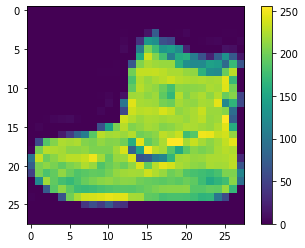

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
print(np.max(train_images))
print(np.max(test_images))

255
255


In [13]:
train_images = train_images / 255
test_images = test_images / 255

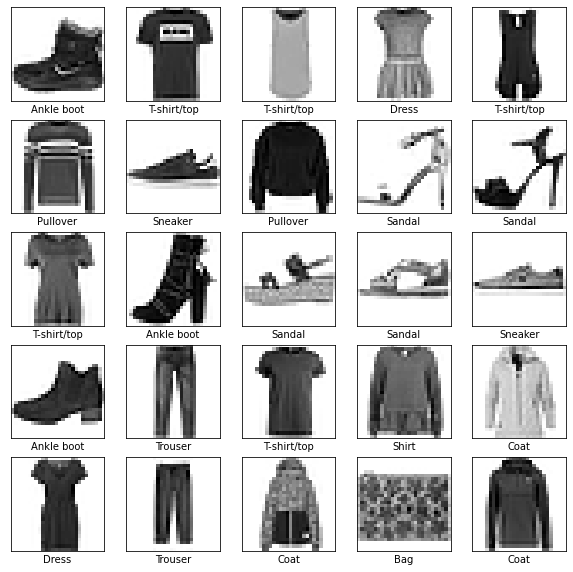

In [16]:
plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, 1+i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

plt.show()

## Set up the model

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [18]:
model.compile(optimizer='adam', 
             loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [19]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.4964 - accuracy: 0.8264
Epoch 2/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.3735 - accuracy: 0.8644
Epoch 3/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3373 - accuracy: 0.8768
Epoch 4/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3119 - accuracy: 0.8863
Epoch 5/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.2973 - accuracy: 0.8903
Epoch 6/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.2799 - accuracy: 0.8972
Epoch 7/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2693 - accuracy: 0.9007
Epoch 8/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.2584 - accuracy: 0.9035
Epoch 9/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2485 - accuracy: 0.9079
Epoch 10/10
60

In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy', test_acc)
print('\nTest loss', test_loss)

10000/10000 - 0s - loss: 0.3363 - accuracy: 0.8822

Test accuracy 0.8822

Test loss 0.3362919074177742


## Make predictions

In [21]:
probability_model = keras.Sequential([model, keras.layers.Softmax()])

In [22]:
predictions = probability_model.predict(test_images)

In [23]:
print(predictions[0])

[7.4497542e-08 4.7287068e-09 1.5722564e-07 7.9476347e-12 5.8264242e-09
 3.0419866e-03 3.7057583e-07 2.6290170e-03 1.1674957e-06 9.9432725e-01]


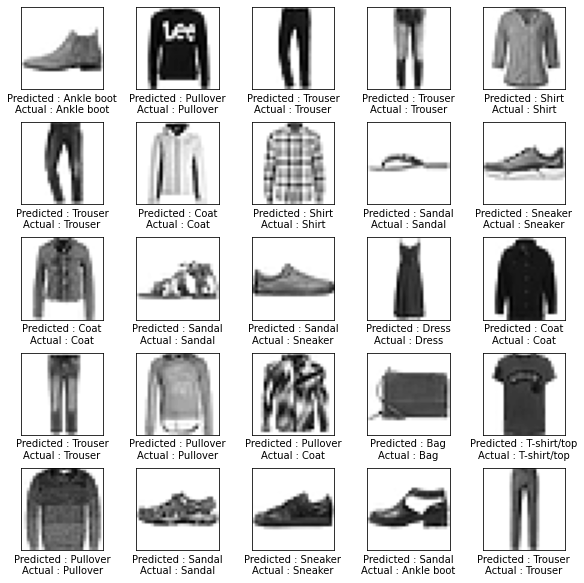

In [46]:
plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, 1+i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap = plt.cm.binary)
    plt.xlabel("Predicted : " + class_names[np.argmax(predictions[i])] + "\nActual : " + class_names[test_labels[i]])

plt.subplots_adjust(hspace=0.4)

plt.show()

In [53]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label],
                                        color=color))

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    


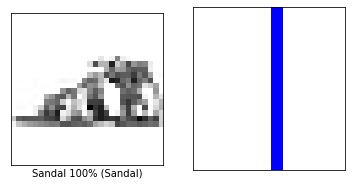

In [60]:
i = 11

plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

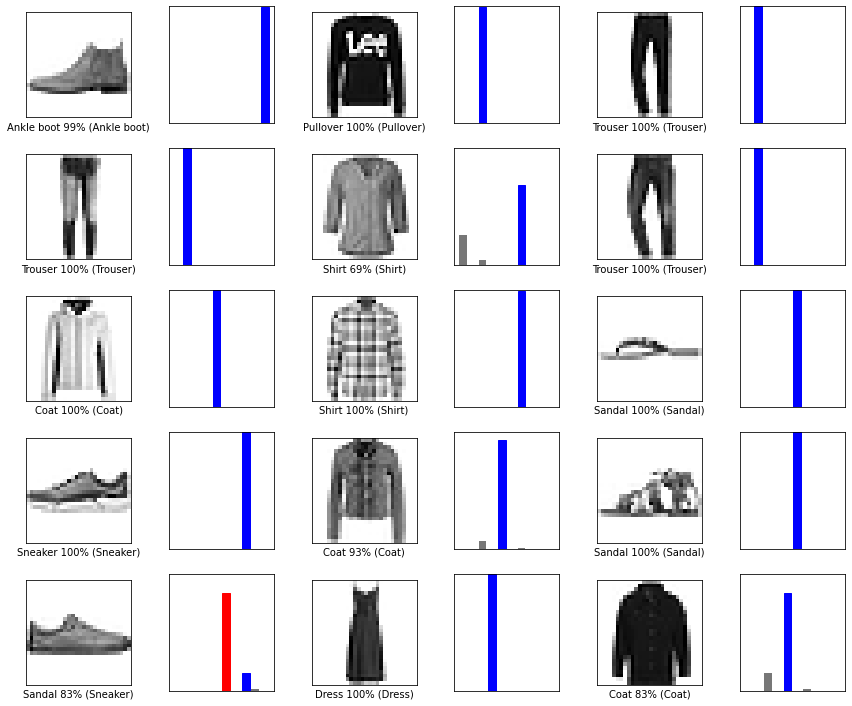

In [62]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)

plt.tight_layout()
plt.show()

## Use the model

In [63]:
img = test_images[100]

print(img.shape)

(28, 28)


In [64]:
img = np.expand_dims(img, 0)
print(img.shape)

(1, 28, 28)


In [65]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[2.8851824e-03 1.6138467e-05 7.4973009e-06 9.9649447e-01 1.1462750e-05
  2.7400981e-07 5.8407919e-04 8.8712135e-11 2.4885216e-07 6.5219513e-07]]


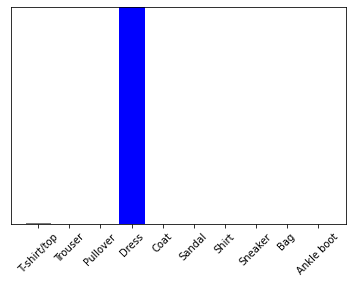

In [66]:
plot_value_array(100, predictions_single[0], test_labels)

_ = plt.xticks(range(10), class_names, rotation=45)

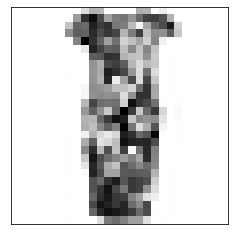

In [68]:
plt.figure()
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(img[0], cmap=plt.cm.binary)
plt.show()